In [73]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report,roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


In [ ]:
data = pd.read_csv('Task 3 and 4_Loan_Data.csv')

In [45]:
print(data.isnull().sum())

customer_id                 0
credit_lines_outstanding    0
loan_amt_outstanding        0
total_debt_outstanding      0
income                      0
years_employed              0
fico_score                  0
default                     0
dtype: int64


In [46]:
print(data.dtypes)

customer_id                   int64
credit_lines_outstanding      int64
loan_amt_outstanding        float64
total_debt_outstanding      float64
income                      float64
years_employed                int64
fico_score                    int64
default                       int64
dtype: object


In [47]:
print(data.describe())

        customer_id  credit_lines_outstanding  loan_amt_outstanding  \
count  1.000000e+04              10000.000000          10000.000000   
mean   4.974577e+06                  1.461200           4159.677034   
std    2.293890e+06                  1.743846           1421.399078   
min    1.000324e+06                  0.000000             46.783973   
25%    2.977661e+06                  0.000000           3154.235371   
50%    4.989502e+06                  1.000000           4052.377228   
75%    6.967210e+06                  2.000000           5052.898103   
max    8.999789e+06                  5.000000          10750.677810   

       total_debt_outstanding         income  years_employed    fico_score  \
count            10000.000000   10000.000000    10000.000000  10000.000000   
mean              8718.916797   70039.901401        4.552800    637.557700   
std               6627.164762   20072.214143        1.566862     60.657906   
min                 31.652732    1000.000000    

In [48]:
print(data['default'].value_counts())

default
0    8149
1    1851
Name: count, dtype: int64


In [49]:
X = data[['credit_lines_outstanding', 'loan_amt_outstanding', 'total_debt_outstanding', 'income', 'years_employed', 'fico_score']]
y = data['default']

In [50]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


* **1. Logistic Regression**

In [65]:
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)
logreg_pred = logreg_model.predict(X_test)
logreg_proba = logreg_model.predict_proba(X_test)[:, 1] 


* **2. Decision Tree**

In [64]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
dt_proba = dt_model.predict_proba(X_test)[:, 1]


* **3. Support Vector Machine (SVM)**

In [66]:


svm_model = SVC(probability=True) 
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
svm_proba = svm_model.predict_proba(X_test)[:, 1]

* **4. Random Forest**

In [67]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_proba = rf_model.predict_proba(X_test)[:, 1]


* **5. Neural Network**

In [68]:
nn_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42) 
nn_model.fit(X_train, y_train)
nn_pred = nn_model.predict(X_test)
nn_proba = nn_model.predict_proba(X_test)[:, 1]


Logistic Regression Accuracy: 0.996
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1652
           1       1.00      0.98      0.99       348

    accuracy                           1.00      2000
   macro avg       1.00      0.99      0.99      2000
weighted avg       1.00      1.00      1.00      2000

Logistic Regression AUC: 0.9999652110990509
Decision Tree Accuracy: 0.995
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1652
           1       0.99      0.99      0.99       348

    accuracy                           0.99      2000
   macro avg       0.99      0.99      0.99      2000
weighted avg       0.99      0.99      0.99      2000

Decision Tree AUC: 0.9913027747627396
SVM Accuracy: 0.992
SVM Classification Report:
               precision    recall  f1-score   support

           0 

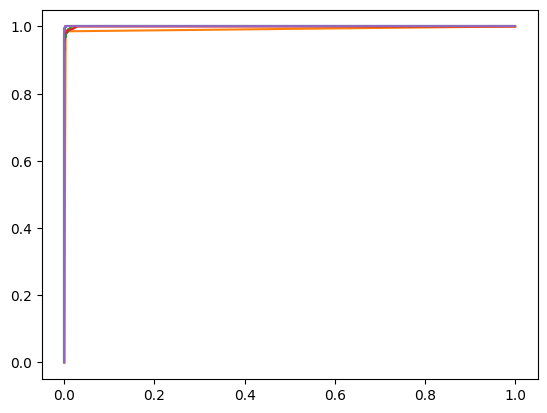

In [74]:
def evaluate_model(model_name, y_test, y_pred, y_proba):
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} Accuracy:", accuracy)
    print(f"{model_name} Classification Report:\n", classification_report(y_test, y_pred))
    
    # Calculate AUC
    auc = roc_auc_score(y_test, y_proba)
    print(f"{model_name} AUC:", auc)

    # Plot ROC Curve
    fpr, tpr, thresholds = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f'{model_name} AUC = {auc:.3f}')

evaluate_model("Logistic Regression", y_test, logreg_pred, logreg_proba)
evaluate_model("Decision Tree", y_test, dt_pred, dt_proba)
evaluate_model("SVM", y_test, svm_pred, svm_proba)
evaluate_model("Random Forest", y_test, rf_pred, rf_proba)
evaluate_model("Neural Network", y_test, nn_pred, nn_proba)

C:\Users\KIIT\AppData\Local\Temp\ipykernel_20364\782621365.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='lower right')


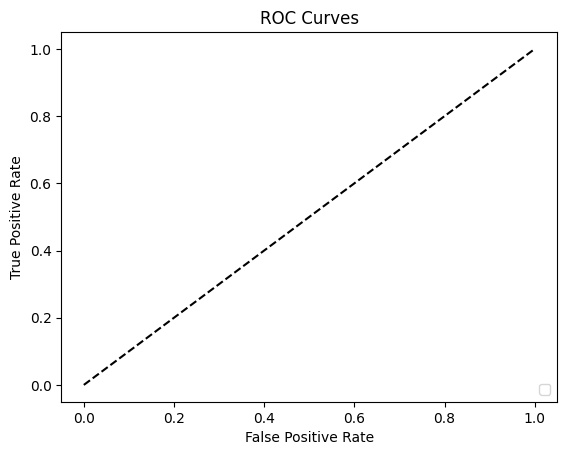

In [75]:
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc='lower right')
plt.show()

* High Overall Performance: All models demonstrate excellent performance with high accuracy, precision, recall, F1-scores, and AUC scores. This suggests that the features used are effective in predicting loan defaults.

* Logistic Regression and Neural Network: These models stand out with the highest accuracy (0.996 and 0.998, respectively) and AUC scores (close to 1), indicating strong predictive power and well-calibrated probability estimates.

* Decision Tree and Random Forest: While slightly lower in accuracy compared to Logistic Regression and Neural Network, they still exhibit excellent performance with high accuracy and AUC scores. Random Forest, being an ensemble method, can often provide better generalization and robustness to overfitting.   

* SVM: Achieves high accuracy and AUC, demonstrating its effectiveness in this classification task.
* Neural Network: The model shows the highest accuracy and AUC score, indicating its strong predictive power and well-calibrated probability estimates. However, it may be computationally expensive and require more tuning compared to other models.

In [76]:
 
logreg_pd = logreg_model.predict_proba(new_borrower_scaled)[0][1]  
expected_loss = logreg_pd * 0.9 

print("Predicted PD for new borrower (Logistic Regression):", logreg_pd)
print("Expected Loss:", expected_loss)

Predicted PD for new borrower (Logistic Regression): 9.602187188468737e-08
Expected Loss: 8.641968469621863e-08


c:\Users\KIIT\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [78]:

dt_pd = dt_model.predict_proba(new_borrower_scaled)[0][1]  
expected_loss = dt_pd * 0.9  

print("Predicted PD for new borrower (Descision tree):", dt_pd)
print("Expected Loss:", expected_loss)

Predicted PD for new borrower (Descision tree): 0.0
Expected Loss: 0.0


c:\Users\KIIT\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [80]:

svm_pd = svm_model.predict_proba(new_borrower_scaled)[0][1]  
expected_loss = dt_pd * 0.9  

print("Predicted PD for new borrower (svm tree):", svm_pd)
print("Expected Loss:", expected_loss)

Predicted PD for new borrower (svm tree): 1.0000000994736041e-07
Expected Loss: 0.0


c:\Users\KIIT\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [82]:

rf_pd = dt_model.predict_proba(new_borrower_scaled)[0][1]  
expected_loss = rf_pd * 0.9  

print("Predicted PD for new borrower (Random forest):", rf_pd)
print("Expected Loss:", expected_loss)

Predicted PD for new borrower (Random forest): 0.0
Expected Loss: 0.0


c:\Users\KIIT\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [83]:

nn_pd = nn_model.predict_proba(new_borrower_scaled)[0][1]  
expected_loss = dt_pd * 0.9  

print("Predicted PD for new borrower (Neural Network):", nn_pd)
print("Expected Loss:", expected_loss)

Predicted PD for new borrower (Descision tree): 1.1948318596985224e-08
Expected Loss: 0.0


c:\Users\KIIT\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
